In [1]:
%%HTML
<iframe id="test" name="id_name" width="950" height="600" frameborder="0" marginwidth="0" marginheight="0" scrolling="yes" src="https://cpuu.postype.com/post/161789"></iframe>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
##보통 데이터 종류가 많음. 여기에서는 임의로 10개의 데이터를 줌.
x_data = [4.0391, 1.3197, 9.5613, 0.5978, 3.5316, 0.1540, 1.6899, 7.3172, 4.5092, 2.9632]
y_data = [11.4215, 10.0112, 30.2991, 1.0625, 13.1776, -3.1976, 6.7367, 23.8550, 14.8951, 11.6137]

##사람이 정답의 대략적인 범위를 추정할 수 있는 경우에 문제를 풀이하기 쉽도록(노가다 횟수 줄이도록)...
##변수의 범위를 지정할수 있음. 우리가 구하고자하는 값 W, b
##초기값으로 -5~ 5 사이에서 랜덤
W = tf.Variable(tf.random_uniform([1], -5.0, 5.0))
b = tf.Variable(tf.random_uniform([1], -5.0, 5.0))

##placeholer형, 선언과 동시에 초기화 되는 것이 아니라 선언 후 값이 전달되는 자료형
##보통 입력값을 말한다.
##다른 텐서(Tensor)를 placeholer에 맵핑시킴으로써 값이 전달된다.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

##가설(1차방정식)
hypothesis = W * X + b

##최소제곱법, reduce_mean 과 mean의 차이- mean은 결과데이터의 형태 지정함.
##defualt형태는 float64형태, 그러나 reduce_mean의 경우 입력 데이터의 형태에 따라
##바뀐다
## x = tf.constant([1, 0, 1, 0])
## tf.reduce_mean(x)  # 0
## y = tf.constant([1., 0., 1., 0.])
## tf.reduce_mean(y)  # 0.5
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [3]:
#자료형 확인
print(hypothesis)
print(W)
print(Y)
print(W)
print(cost)

Tensor("add:0", dtype=float32)
<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>
Tensor("Placeholder_1:0", dtype=float32)
<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>
Tensor("Mean:0", shape=(), dtype=float32)


In [4]:
##Learning rate 0.01로 할당
#a = tf.Variable(0.01)
a=tf.constant(0.01)

##train = tf.train.GradientDescentOptimizer(a).minimize(cost)로 줄여서 사용가능
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

global_step_tensor= tf.Variable(0, trainable=False, name='global_step')
#init은 모든 variable=텐서를 가리키는 노드(operation) 집합.
##tf.initialize_all_variables will be removed after 2017-03-02.
##Use `tf.global_variables_initializer` instead.
#init = tf.initialize_all_variables()
init = tf.global_variables_initializer()




In [5]:
# tf.summary.scalar(X.name, X)
# tf.summary.scalar(Y.name, Y)
#variable
# tf.summary.histogram('weight_name', histogram)
tf.summary.histogram(W.name, W)
tf.summary.histogram(b.name, b)


INFO:tensorflow:Summary name Variable:0 is illegal; using Variable_0 instead.
INFO:tensorflow:Summary name Variable_1:0 is illegal; using Variable_1_0 instead.


<tf.Tensor 'Variable_1_0:0' shape=() dtype=string>

In [6]:
merged = tf.summary.merge_all()

In [7]:
##Session에서 연산 끝났으면, 자원을 시스템에 돌려주기 위하여 sess.close()를 통해 닫아야함.
## with tf.Session() as sess:로 대체 가능하고 이경우 자동으로 세션 닫힘.
##with tf.Session() as sess:
##  result = sess.run([product])
##  print(result)

##Session에 () 빈칸이 옴(아무 파라미터도 넘기지 않음)--> 기본 로컬세션에서 수행됨.
##즉, 세션을 실행하자마자, 모든 tf.variable 인스턴스들이 호출되어 초기화됨.
sess = tf.Session()

writer = tf.summary.FileWriter('./logs/basic_regression',sess.graph)


##텐서플로우에서 변수형 variable은 그래프를 실행하기 전에 초기화를 해줘야 그 값이 변수에
##지정이 된다. 따라서 세션을 초기화하는 순간 W,b에 값이 지정됨.
sess.run(init)
global_step = tf.train.global_step(sess,global_step_tensor)

In [8]:
#feed_dict를 통해 본인이 지정하는 특정한 값을 파라미터로 전달해줄수 있음.
#실행할 노드는 train이고, 입력값으로 x_data, y_daya를 넣음.
for step in range(2001):
    sess.run(train, feed_dict={X:x_data, Y:y_data})
    summary = sess.run(merged)
    writer.add_summary(summary, global_step)
    global_step +=1
    if step % 20 == 0:
        print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W), sess.run(b))

##평가,실행할 노드는 hypothesis이고, x는 5를 대입.
answer = sess.run(hypothesis, feed_dict={X:5})
print('When X=5, hypothesis = ' + str(answer))

0 11.669245 [2.3906944] [2.4452014]
20 6.706755 [2.8935385] [2.264298]
40 6.448018 [2.9327621] [2.0400076]
60 6.256722 [2.9664834] [1.8471509]
80 6.1152916 [2.9954782] [1.6813236]
100 6.010726 [3.0204093] [1.5387379]
120 5.9334173 [3.0418465] [1.4161357]
140 5.87626 [3.060279] [1.3107166]
160 5.834002 [3.076128] [1.2200725]
180 5.8027587 [3.089756] [1.1421328]
200 5.7796597 [3.1014738] [1.0751164]
220 5.762582 [3.1115491] [1.0174927]
240 5.7499547 [3.1202126] [0.9679449]
260 5.7406206 [3.127662] [0.92534167]
280 5.733718 [3.134067] [0.8887093]
300 5.728615 [3.1395745] [0.85721105]
320 5.724842 [3.14431] [0.8301275]
340 5.7220526 [3.148382] [0.8068397]
360 5.7199917 [3.1518831] [0.7868159]
380 5.7184668 [3.1548936] [0.7695984]
400 5.7173395 [3.1574821] [0.7547941]
420 5.7165055 [3.1597078] [0.74206454]
440 5.71589 [3.1616218] [0.7311191]
460 5.715434 [3.1632674] [0.72170764]
480 5.715097 [3.1646821] [0.7136156]
500 5.7148485 [3.1658988] [0.7066572]
520 5.714664 [3.166945] [0.70067436]
5

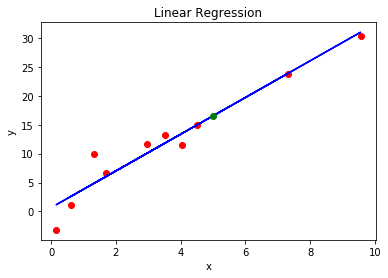

In [9]:
# Show the linear regression result
plt.figure(1)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
# 주어진 데이터들을 점으로 표시
plt.plot(x_data, y_data, 'ro')
# 예측한 일차함수를 직선으로 표시
plt.plot(x_data, sess.run(W) * x_data + sess.run(b), 'b')
# X=5 일때의 계산 값
plt.plot([5], answer, 'go')
plt.show()